# **Import Necessary Libraries**

In [ ]:
#Installing the libraries with the specified version.
!pip uninstall -y numpy
!pip install --no-cache-dir --force-reinstall numpy


Found existing installation: numpy 2.4.2
Uninstalling numpy-2.4.2:
  Successfully uninstalled numpy-2.4.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 193.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 3.0.0 which is incompatible.
gradio 5.50.0 requires pandas<3.0,>=1.0, but you have pandas 3.0.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4.2 which is incompatible.
bqplot 0.12.45 requires pandas<3.0.0,>=1.0.0, but you have pandas 3.0.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.4.2 which is incompatible.
db-dtypes 1.5.0 requires pandas<3.0.0,>=1.5.3, but you have pandas 3.0.0 which is incompatible.


In [ ]:
#Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

#Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

#To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

#To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

#To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#For Classification
from sklearn.metrics import classification_report

#To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

#To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

#To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

#To supress warnings
import warnings

warnings.filterwarnings("ignore")

# **Connecting to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bank Data Project/creditcard.csv')

# **Overview of Data**

In [ ]:
#Create Copy of Data
df = data.copy()

In [ ]:
#Displaying Data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,-1.593,2.712,-0.689,4.627,-0.924,1.108,1.992,0.511,-0.683,1.476,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,-0.150,0.916,1.215,-0.675,1.165,-0.712,-0.026,-1.221,-1.546,0.060,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,0.412,0.063,-0.184,-0.511,1.329,0.141,0.314,0.396,-0.577,0.001,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,-1.934,-0.963,-1.042,0.450,1.963,-0.609,0.510,1.114,2.898,0.127,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,-0.915,-1.040,-0.032,-0.188,-0.084,0.041,-0.303,-0.660,0.167,-0.256,0.383,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [ ]:
#Checking Data Shape
df.shape

(284807, 31)

In [ ]:
#Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Checking Duplicates
df.duplicated().sum()

np.int64(1081)

In [ ]:
#Checking Missing Values
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#Summary of Variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [ ]:
#Checking Transaction Ratio
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#Analyzing Duplicates Proportions with Class
df[df.duplicated()]['Class'].value_counts(normalize=True)


,proportion
Class,
0,0.982
1,0.018


In [ ]:
#Decided to Drop Duplicates
df = df.drop_duplicates()

In [ ]:
#Checking New Shape
df.shape

(283726, 31)

## **Comments:**


*   Data was imported succesfully and copied into the df variable to avoid corrupting the original set

*   The data set has a total of 283726 rows and 31 columns

* All variables appear to be floats except for our class

* There are no missing values but there are 1081 duplicates (.38% of data) which I removed to minimize overfitting our models later on; Also, I made sure that the duplicates were actual errors and not an indicative of potential fraud

* The ratio of nomal transactions to fradulant transactions is 283253:473; only .17% of the data is fraud... Our model needs to be able to catch this small ratio





# **Exploratory Data Analysis (Univariate)**

## **Functions for EDA**

In [ ]:
#Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
#Funciton for barplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Time**

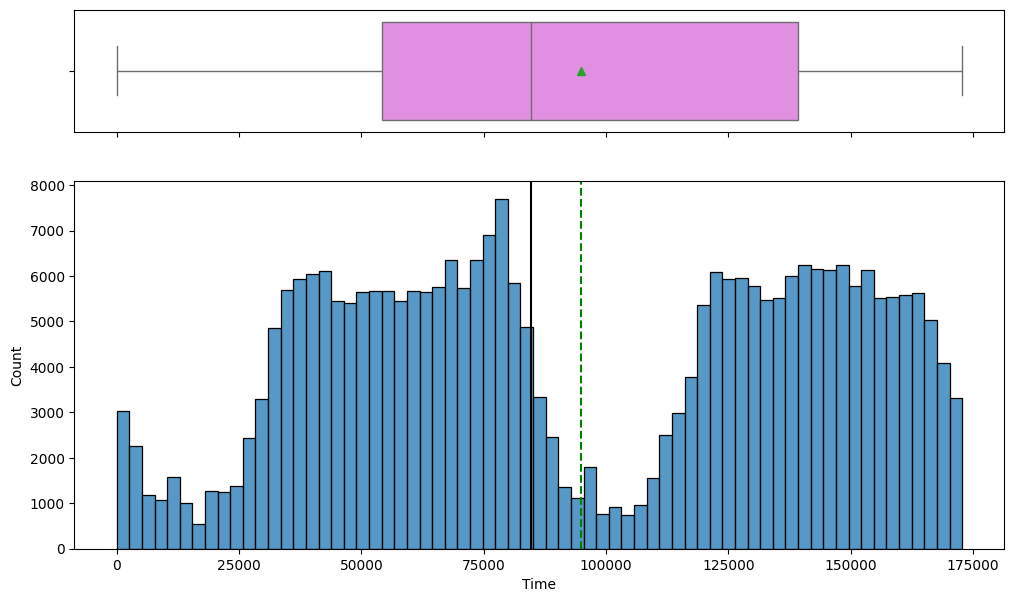

In [ ]:
#Visualizing Time
histogram_boxplot(data, "Time")

## **Amount**

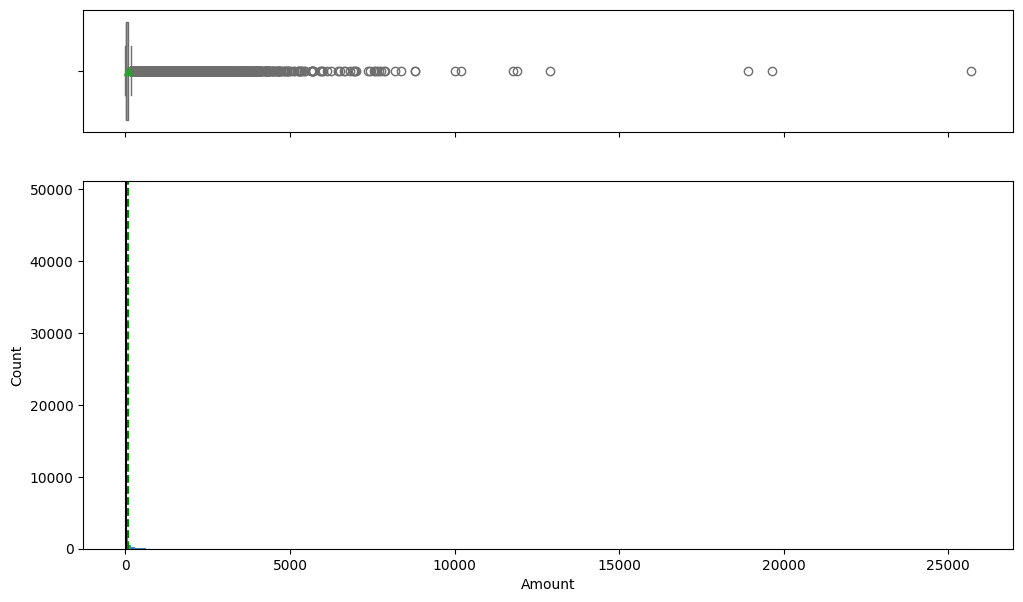

In [ ]:
#Visualizing Amount
histogram_boxplot(data, "Amount")

## **Class**

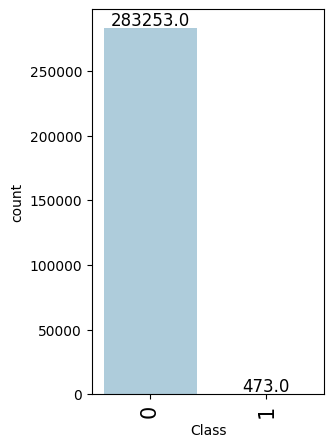

In [ ]:
#Barplot of Class
labeled_barplot(df,"Class")

## **Comments:**

* Sanity Check on Time and Amount

* For Time, we can see that is binomial with a big drop in the 100,000 mark and no real outliers... which confirms that the data was over a 2 day period

* Amount is heavily right skewed as it has a right tail and many outliers... this means that most transactions are generally small

* Before moving on to our bivariate analysis... we need to ask ourselves: Does fraud spike at specific times, and are fraud amounts larger or smaller in nature?

# **Exploratory Data Analysis (Bivariate)**

## **Class Vs Amount**

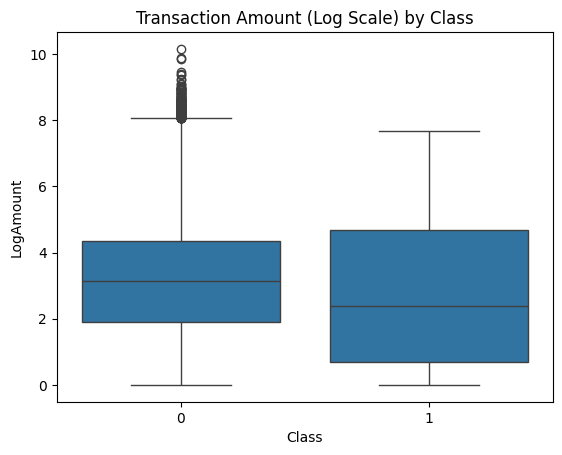

In [ ]:
#Loging Amount For Clarity
df['LogAmount'] = np.log1p(df['Amount'])

sns.boxplot(x='Class', y='LogAmount', data=df)
plt.title("Transaction Amount (Log Scale) by Class")
plt.show()

## **Fraud Over Time**

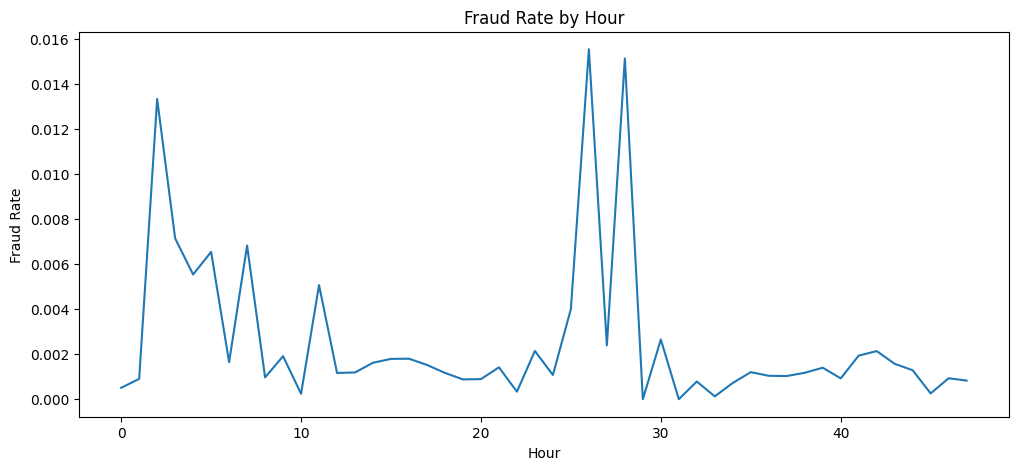

In [ ]:
#Time By Hour
df['Hour'] = df['Time'] // 3600

hourly = df.groupby('Hour')['Class'].mean()

plt.figure(figsize=(12,5))
hourly.plot()
plt.title("Fraud Rate by Hour")
plt.ylabel("Fraud Rate")
plt.show()

## **Comments:**

* At first, the Amount vs Class graph was extremely unclear due to outliers, so I logged Amount; We can see that most of the fraud amounts tend to be smaller than legitimate transactions

* For Time, we converted the time by dividing it by 3600 days, which would give us the time of each day by the hour... from there we plotted class to create a fraud rate time chart which shows that most fraud transactions are rare but occur in temporal clusters

* The key insights seem to indicate that fraud behavior blends into normal transaction patterns, making simple rule-based detection ineffective

* Effective fraud detection requires probabilistic or machine learning approaches rather than fixed thresholds

# **Correlation Analysis**

In [ ]:
#Identifying Correlations
corr = df.corr()['Class'].sort_values(ascending=False)
corr.head(10), corr.tail(10)

(Class   1.000
 V11     0.149
 V4      0.129
 V2      0.085
 V19     0.034
 V8      0.033
 V21     0.026
 V27     0.022
 V20     0.021
 V28     0.010
 Name: Class, dtype: float64,
 V9    -0.094
 V1    -0.094
 V18   -0.105
 V7    -0.172
 V3    -0.182
 V16   -0.187
 V10   -0.207
 V12   -0.251
 V14   -0.293
 V17   -0.313
 Name: Class, dtype: float64)

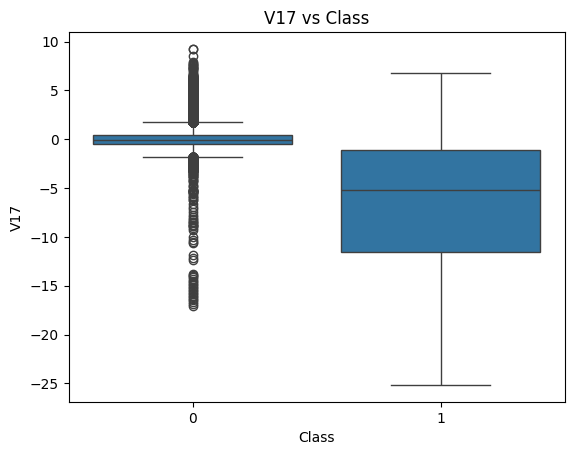

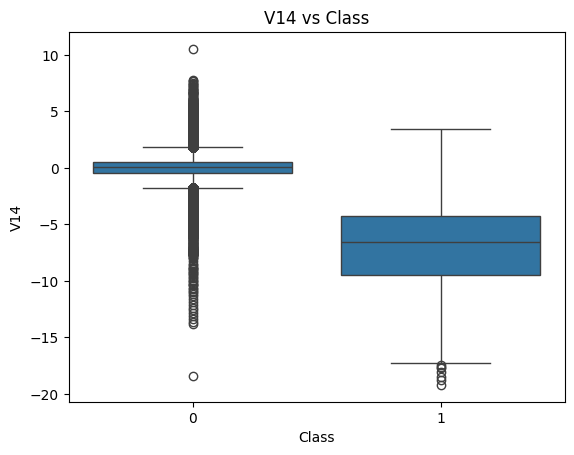

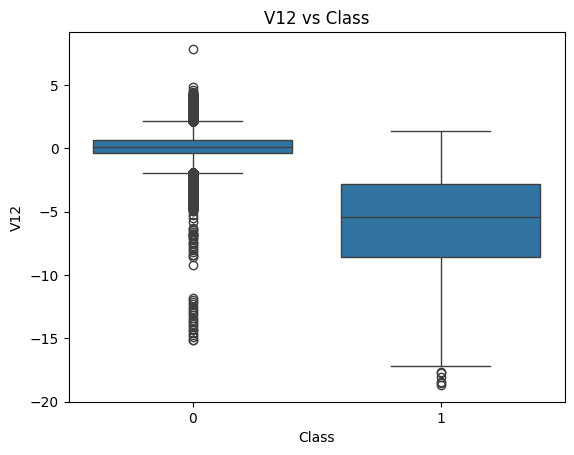

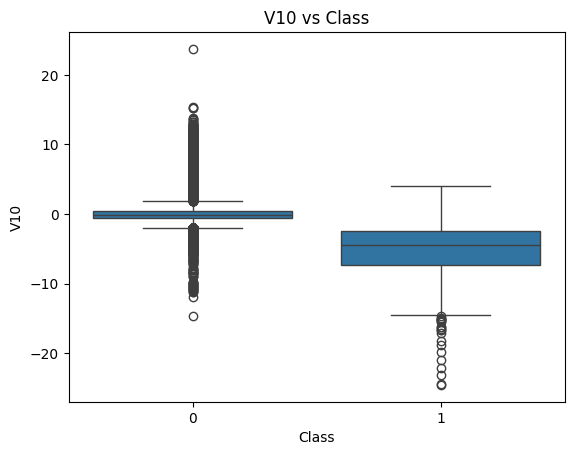

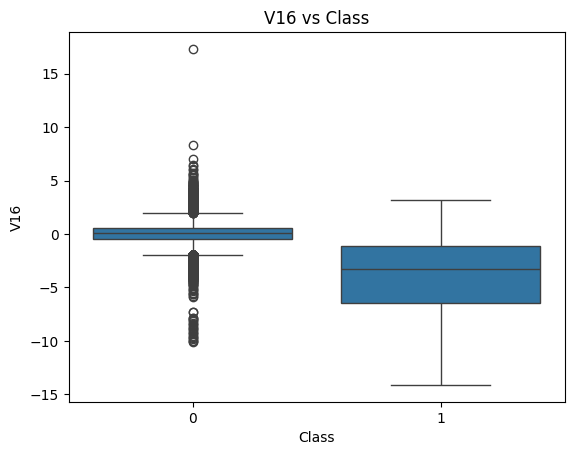

In [ ]:
#Graphing Correlations
top_features = corr.abs().sort_values(ascending=False)[1:6].index

for feature in top_features:
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f"{feature} vs Class")
    plt.show()

## **Comments:**

* Correlation analysis shows several features (notably V17, V14, V12, and V10) differ significantly between fraud and legitimate transactions

* Fraudulent transactions display shifted distributions across multiple variables, confirming that fraud detection relies on multivariate patterns rather than single-variable rules

# **Data Pre-Processing**

## **Drop LogAmount**

In [ ]:
#LogAmount Not Needed
df = df.drop(columns=['LogAmount'])

In [ ]:
#Sanity Check
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

## **Feature Seperation**

In [ ]:
#Separating features and the target column
X = df.drop('Class', axis=1)
y = df['Class']

## **Train/Test Split**

In [ ]:
#Created a 80/20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
#Sanity Check
y_train.value_counts(), y_test.value_counts()


(Class
 0    226602
 1       378
 Name: count, dtype: int64,
 Class
 0    56651
 1       95
 Name: count, dtype: int64)

## **Comments:**

* Seperated Class and created an 80/20 train and test split; Other data pre-processing techniques such as Log Transformations and outlier treatments are unessecary

* Stratified the Train/Test Split and performed a sanity check, ratios were varified and data is ready for modeling

# **Model Builing**

## **Baseline Logistic Regression**

In [ ]:
#Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Predictions Generator
y_pred = model.predict(X_test)

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[56643     8]
 [   36    59]]


In [ ]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.62      0.73        95

    accuracy                           1.00     56746
   macro avg       0.94      0.81      0.86     56746
weighted avg       1.00      1.00      1.00     56746



## **Comments:**

* Model shows 87% precision, meaning that 87% of flagged transactions are truly fraudulent

* Model has a 55% recall, so we missed 45% of true fraudulent transactions

* Model has a F1 score of .67; Indicating moderate balance between fraud detection and false alart control

* Accuracy is not a true indicator of model performance when it comes to catching fraudulent transactions due to the small proportion of fraud transactions; We could have a model that is 98% accurate but it doesnt say anything if our fraduelnt transactions are only .5%

* Improvements are needed: the model is too conservative and misses many fraudulent transactions (high false negatives)... The model needs to become more aggressive in flagging suspicious activity

## **Weight Balance Logistic Regression Tuning**

In [ ]:
#Weight Balance Tuning
model_bal = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
model_bal.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
#Predictions Generator
y_pred_bal = model_bal.predict(X_test)

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_bal))

[[54982  1669]
 [   12    83]]


In [ ]:
#Classification Report
print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56651
           1       0.05      0.87      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746



## **Comments:**

* Precision decreased and is now at 5%... we raised too many false flags

* Recall increased to 87%, this is great as we caught most of the fraudulent transactions

* F1 scores dropped to 9% which is expected as we need a good balance between Precision and Recall

* Changing the weights punished the model too harshly and we got over aggresive; Too many flags raised... need better balance

## **Decision Threshold Logistic Regression Tuning**

In [ ]:
#Get Model's Estimated Probability
y_scores = model_bal.predict_proba(X_test)[:, 1]

In [ ]:
#Threshold Evaluations
def threshold_table(y_true, y_scores, thresholds):
    rows = []
    for t in thresholds:
        y_pred_t = (y_scores >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_t).ravel()

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

        alerts = tp + fp
        rows.append({
            "threshold": t,
            "tp": tp, "fp": fp, "fn": fn, "tn": tn,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "alerts": alerts
        })
    return pd.DataFrame(rows)

thresholds = np.round(np.linspace(0.1, 0.99, 10), 2)
tbl = threshold_table(y_test, y_scores, thresholds)
tbl

,threshold,tp,fp,fn,tn,precision,recall,f1,alerts
0,0.100,88,11705,7,44946,0.007,0.926,0.015,11793
1,0.200,87,5915,8,50736,0.014,0.916,0.029,6002
2,0.300,83,3621,12,53030,0.022,0.874,0.044,3704
3,0.400,83,2423,12,54228,0.033,0.874,0.064,2506
4,0.500,83,1669,12,54982,0.047,0.874,0.090,1752
5,0.590,83,1222,12,55429,0.064,0.874,0.119,1305
6,0.690,82,842,13,55809,0.089,0.863,0.161,924
7,0.790,81,537,14,56114,0.131,0.853,0.227,618
8,0.890,80,306,15,56345,0.207,0.842,0.333,386
9,0.990,75,37,20,56614,0.670,0.789,0.725,112


In [ ]:
#Select Best Threshold
best_t = tbl.sort_values("f1", ascending=False).iloc[0]["threshold"]
best_t

np.float64(0.99)

In [ ]:
#Use Threshold
t = float(best_t)
y_pred_t = (y_scores >= t).astype(int)

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_t))

[[56614    37]
 [   20    75]]


In [ ]:
#Classification Report
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.67      0.79      0.72        95

    accuracy                           1.00     56746
   macro avg       0.83      0.89      0.86     56746
weighted avg       1.00      1.00      1.00     56746



## **Comments:**

* Threshold tuning significantly improved operational performance by maintaining high fraud recall while drastically reducing false alerts, leading to a better balance between fraud detection effectiveness and analyst workload

## **Baseline Random Forest**

In [ ]:
#Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
#Predictions Generator
y_pred_rf = rf.predict(X_test)

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

[[56649     2]
 [   26    69]]


In [ ]:
#Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



## **Comments:**

* Baseline Random Forest significantly improves fraud detection while keeping false alerts extremely low, demonstrating the benefit of nonlinear modeling approaches in detecting complex fraud patterns

* Random Forest provided the best operational balance, maintaining strong fraud detection while drastically reducing false alerts compared to logistic regression models.

# **Operational Analytics; Risk Scores**

In [ ]:
#Create Risk Score Probabilities
y_scores_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
#Make a Table
results = X_test.copy()
results['FraudProb'] = y_scores_rf
results['ActualFraud'] = y_test.values

results.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour,FraudProb,ActualFraud
86568,61290.000,1.229,-0.063,0.274,0.647,-0.048,0.372,-0.224,0.080,0.641,-0.273,-1.253,0.465,0.401,-0.293,-0.102,-0.400,0.034,-0.784,0.141,-0.097,-0.130,-0.084,-0.152,-0.700,0.599,0.491,0.003,0.002,11.500,17.000,0.000,0
251557,155394.000,-0.203,1.177,-0.760,-0.518,0.630,-0.722,0.639,0.243,-0.157,-0.507,-1.395,-0.092,0.022,0.731,0.496,-0.200,-0.434,0.349,0.163,-0.098,0.385,1.207,-0.083,0.508,-0.711,-0.235,0.380,0.261,1.940,43.000,0.000,0
20232,30881.000,-1.673,1.401,1.504,2.175,0.700,1.062,1.114,-0.536,-0.253,3.071,0.769,0.202,1.349,-0.951,0.922,0.367,-1.215,0.599,1.426,0.828,-0.526,-0.409,-0.280,-0.846,-0.155,-0.062,0.008,0.114,91.280,8.000,0.000,0
68952,53203.000,0.819,-1.125,0.515,0.514,-1.009,0.488,-0.581,0.188,-0.999,0.872,0.907,0.386,0.102,0.276,0.703,-1.005,-0.426,1.774,-1.400,-0.110,-0.057,-0.168,-0.199,-0.337,0.239,-0.289,0.038,0.058,228.000,14.000,0.000,0
191852,129429.000,2.010,0.106,-1.753,0.588,0.375,-0.638,0.009,-0.129,0.493,-0.527,0.985,1.037,0.418,-1.642,-1.123,0.317,0.892,0.611,0.216,-0.135,0.009,0.357,-0.013,-0.447,0.112,0.643,-0.037,-0.043,1.410,35.000,0.000,0


In [ ]:
#Rank Transactions
results_sorted = results.sort_values(
    'FraudProb', ascending = False
)
results_sorted.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour,FraudProb,ActualFraud
43160,41397.000,-14.970,8.401,-16.867,8.252,-13.565,-2.782,-14.264,9.643,-7.701,-14.227,5.611,-11.794,1.598,-11.607,-0.044,-9.287,-19.900,-7.518,1.244,-1.615,2.714,-0.101,-0.440,0.520,0.789,0.064,-1.621,-1.105,273.010,11.000,1.000,1
15736,27163.000,-23.914,13.766,-25.734,6.291,-17.785,-4.572,-17.391,15.794,-3.820,-8.442,5.020,-7.046,0.693,-7.077,-0.047,-6.208,-12.532,-4.829,0.979,1.640,1.773,-1.748,-1.093,0.148,1.664,-0.221,1.458,0.430,99.990,7.000,1.000,1
15476,26863.000,-21.209,12.652,-23.554,6.174,-16.027,-4.422,-16.229,14.116,-3.923,-8.720,5.494,-7.741,0.385,-8.078,-0.015,-6.701,-13.159,-4.903,1.146,1.602,1.758,-1.523,-0.904,0.130,1.455,-0.223,1.551,0.461,99.990,7.000,1.000,1
42769,41237.000,-10.282,6.302,-13.272,8.925,-9.976,-2.833,-12.703,6.707,-7.078,-12.806,6.786,-13.064,1.180,-13.695,0.951,-10.954,-20.584,-7.517,2.872,-0.248,2.479,0.367,0.043,0.478,0.158,0.330,0.164,-0.486,118.300,11.000,1.000,1
251477,155359.000,-1.068,5.262,-8.439,7.316,0.008,-2.126,-3.307,1.870,-4.523,-5.173,5.591,-5.640,0.785,-12.044,0.354,-1.921,-1.880,0.680,0.798,0.821,0.548,-0.492,0.056,-1.145,0.069,0.535,0.539,0.124,0.770,43.000,1.000,1
42936,41305.000,-12.981,6.721,-13.456,8.699,-11.480,-2.682,-14.019,8.218,-7.931,-12.696,5.589,-11.961,1.539,-9.887,0.634,-11.350,-21.710,-8.859,3.630,-0.843,2.550,-0.532,-0.235,0.673,0.227,-0.006,-1.186,-0.747,59.680,11.000,1.000,1
178208,123525.000,-5.905,4.440,-8.632,7.789,-4.990,-1.200,-7.674,4.126,-5.316,-4.891,4.220,-6.408,1.328,-5.854,-0.928,-7.086,-12.624,-4.745,2.798,-0.506,1.775,1.266,-0.199,0.015,-0.000,0.544,-1.168,-1.206,45.510,34.000,0.990,1
42009,40919.000,-2.740,3.658,-4.111,5.340,-2.667,-0.093,-4.389,-0.280,-2.822,-4.466,3.970,-7.347,-1.163,-8.226,0.825,-6.773,-8.816,-4.569,1.127,0.185,2.417,-0.098,0.382,-0.155,-0.404,0.278,0.830,0.219,112.330,11.000,0.990,1
8845,12095.000,-4.728,3.044,-5.598,5.928,-2.191,-1.529,-4.487,0.916,-1.307,-4.139,5.149,-11.124,0.543,-7.841,0.744,-6.777,-9.932,-4.093,1.505,-0.208,0.651,0.255,0.629,-0.238,-0.671,-0.034,-1.332,0.706,30.390,3.000,0.990,1
154718,102669.000,-5.604,5.222,-7.517,8.118,-2.757,-1.575,-6.330,2.998,-4.508,-7.334,7.189,-10.655,2.595,-10.243,-0.191,-5.504,-8.698,-1.934,1.959,0.228,1.243,0.428,-0.101,-0.520,-0.177,0.461,-0.107,-0.480,0.000,28.000,0.990,1


In [ ]:
#Create Alert System
threshold = .8

alerts = results[results["FraudProb"] >= threshold]

alerts.shape
alerts['ActualFraud'].value_counts()

,count
ActualFraud,
1,58
0,1


In [ ]:
#Decision Table
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

summary = []

for t in thresholds:
    alerts = results[results["FraudProb"] >= t]
    fraud_caught = alerts["ActualFraud"].sum()
    total_alerts = len(alerts)
    false_alerts = total_alerts - fraud_caught

    summary.append({
        "Threshold": t,
        "Total Alerts": total_alerts,
        "Fraud Caught": fraud_caught,
        "False Alerts": false_alerts
    })

pd.DataFrame(summary)


,Threshold,Total Alerts,Fraud Caught,False Alerts
0,0.500,72,70,2
1,0.600,66,65,1
2,0.700,62,61,1
3,0.800,59,58,1
4,0.900,44,43,1
5,0.950,32,32,0


## **Comments:**

* At .8 threshold, a total of 59 transactions were flagged with only 1 false alarms

* 98% precision indicates high levels of detected fraud cases with little to no wasted effort

* A decision table was made to compare and contrast different threshold levels; At .50 we were able to succesfully catch 72 fraudulent transactions with only 2 false alarms

# **SQL Data Analysis**

In [ ]:
#Creating Final Data
final_data = results.copy()

final_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour,FraudProb,ActualFraud
86568,61290.000,1.229,-0.063,0.274,0.647,-0.048,0.372,-0.224,0.080,0.641,-0.273,-1.253,0.465,0.401,-0.293,-0.102,-0.400,0.034,-0.784,0.141,-0.097,-0.130,-0.084,-0.152,-0.700,0.599,0.491,0.003,0.002,11.500,17.000,0.000,0
251557,155394.000,-0.203,1.177,-0.760,-0.518,0.630,-0.722,0.639,0.243,-0.157,-0.507,-1.395,-0.092,0.022,0.731,0.496,-0.200,-0.434,0.349,0.163,-0.098,0.385,1.207,-0.083,0.508,-0.711,-0.235,0.380,0.261,1.940,43.000,0.000,0
20232,30881.000,-1.673,1.401,1.504,2.175,0.700,1.062,1.114,-0.536,-0.253,3.071,0.769,0.202,1.349,-0.951,0.922,0.367,-1.215,0.599,1.426,0.828,-0.526,-0.409,-0.280,-0.846,-0.155,-0.062,0.008,0.114,91.280,8.000,0.000,0
68952,53203.000,0.819,-1.125,0.515,0.514,-1.009,0.488,-0.581,0.188,-0.999,0.872,0.907,0.386,0.102,0.276,0.703,-1.005,-0.426,1.774,-1.400,-0.110,-0.057,-0.168,-0.199,-0.337,0.239,-0.289,0.038,0.058,228.000,14.000,0.000,0
191852,129429.000,2.010,0.106,-1.753,0.588,0.375,-0.638,0.009,-0.129,0.493,-0.527,0.985,1.037,0.418,-1.642,-1.123,0.317,0.892,0.611,0.216,-0.135,0.009,0.357,-0.013,-0.447,0.112,0.643,-0.037,-0.043,1.410,35.000,0.000,0


In [ ]:
#Create SQL Database
import sqlite3
conn = sqlite3.connect('fraud_detection.db')

In [ ]:
#Transfer Data
final_data.to_sql('transactions', conn, if_exists='replace', index=False)

56746

In [ ]:
#Query Test
query = """
SELECT COUNT(*) as total_transactions
FROM transactions
"""

pd.read_sql(query, conn)

,total_transactions
0,56746


In [ ]:
#Query Test
query = """
SELECT ActualFraud, COUNT(*) as count
FROM transactions
GROUP BY ActualFraud
"""

pd.read_sql(query, conn)

,ActualFraud,count
0,0,56651
1,1,95


In [ ]:
#Hours Fraud Rate
query = """
SELECT
    Hour,
    COUNT(*) as total_transactions,
    SUM(ActualFraud) as fraud_transactions,
    ROUND(
        1.0 * SUM(ActualFraud) / COUNT(*),
        4
    ) as fraud_rate
FROM transactions
GROUP BY Hour
ORDER BY fraud_rate DESC
LIMIT 10
"""
pd.read_sql(query, conn)

,Hour,total_transactions,fraud_transactions,fraud_rate
0,26.000,334,8,0.024
1,28.000,219,4,0.018
2,2.000,336,4,0.012
3,3.000,372,3,0.008
4,25.000,415,3,0.007
5,11.000,1689,8,0.005
6,7.000,696,3,0.004
7,4.000,235,1,0.004
8,30.000,488,2,0.004
9,14.000,1631,6,0.004


In [ ]:
#Fraud Impact
query = """
SELECT
    ActualFraud,
    COUNT(*) as transactions,
    ROUND(SUM(Amount), 2) as total_amount,
    ROUND(AVG(Amount), 2) as avg_amount
FROM transactions
GROUP BY ActualFraud
"""
pd.read_sql(query, conn)

,ActualFraud,transactions,total_amount,avg_amount
0,0,56651,5025125.890,88.700
1,1,95,14766.310,155.430


## **Comments:**

* Hour 26 shows a fraud rate of 2.4% which is abnormaly higher than the dataset's average

* Suggesting that frausdsters operate during specific time periods to avoid detection

* Monitoring strategies may benefit from tailored time-base adjustments

* Fraudulent transactions tend to be higher than the normal transcation's dollar amount, meaning that financial risk are concentrated in low volume/high value moves

# **Exporting Data For Presentation**

In [68]:
#Exporting Data
from google.colab import files
files.download("fraud_transactions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>